# HW3 MAC De-Randomization

### Importing Necessary Packages

In [531]:
import pandas as pd # To read the data and process it
import os # To read the files in the directory
from sklearn.preprocessing import LabelEncoder # To encode the labels
import matplotlib.pyplot as plt # For heatmap
import seaborn as sns # For heatmap
from sklearn.metrics import homogeneity_completeness_v_measure # To calculate the metrics
import numpy as np # To generate random indices for the second part of the assignment


### Reading The Data & Creating a Data Frame

In [560]:
# Directory path
directory = 'lecture-dataset'

# Getting the list of CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Creating an empty dataframe
df = pd.DataFrame()

# Reading each CSV file and append it to the dataframe
for file in csv_files:
    file_path = os.path.join(directory, file)
    df_temp = pd.read_csv(file_path)
    df = pd.concat([df, df_temp], ignore_index=True)


### Pre-Processing and Examining Data

The data consist of 4988 probe requests and 14 columns. Further investigation is done in the next cells.

In [566]:
display(df)

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,1.684589e+09,76:f7:2b:0e:35:f3,1,1.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
1,1.684589e+09,76:f7:2b:0e:35:f3,1,1.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
2,1.684589e+09,76:f7:2b:0e:35:f3,6,6.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
3,1.684589e+09,76:f7:2b:0e:35:f3,6,6.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
4,1.684589e+09,76:f7:2b:0e:35:f3,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,1.622477e+09,22:45:43:e4:c8:fd,1,1.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,NaN,02040b16,0c1218243048606c,NaN,NaN,144,iPhone6_N
4984,1.622477e+09,22:45:43:e4:c8:fd,6,4.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,NaN,02040b16,0c1218243048606c,NaN,NaN,156,iPhone6_N
4985,1.622477e+09,22:45:43:e4:c8:fd,6,4.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,NaN,02040b16,0c1218243048606c,NaN,NaN,156,iPhone6_N
4986,1.622477e+09,22:45:43:e4:c8:fd,6,5.0,214017ff00000000000000000000000000000000000000...,4.000884e+14,0017f20a00010400000000,NaN,02040b16,0c1218243048606c,NaN,NaN,156,iPhone6_N


As a first step, we convert timestamps to datetime, in case a numerical operation is needed for timestamps

In [ ]:
# Converting the timestamp to datetime
df['Timestamp']=pd.to_datetime(df['Timestamp'], unit='s')

In the next part, the dataframe is cleaned by removing columns that have more than 60% missing or NaN values.

In [557]:
nan_sum = df.isna().sum() # The number of NaN values in each column
nan_percentage = (nan_sum/len(df))*100 # The percentage of NaN values in each column

print(nan_percentage)

col_drop = [] # List of columns to be dropped

# Dropping the columns with more than 60% NaN values
for i in range(0,len(nan_percentage)):
  if nan_percentage.iloc[i] > 60:
    col_drop.append(nan_percentage.index[i])
  
clean_df = df.drop(col_drop, axis=1)
del df # Deleting the original dataframe to free up memory

print("Dropped columns are: ", col_drop)



Timestamp                     0.000000
MAC Address                   0.000000
Channel                       0.000000
DS Channel                    0.581395
HT Capabilities               0.020048
Extended Capabilities         0.020048
Vendor Specific Tags         18.905373
SSID                         91.439455
Supported Rates               0.000000
Extended Supported Rates      0.020048
VHT Capabilities            100.000000
HE Capabilities              81.295108
Length                        0.000000
Label                         0.000000
dtype: float64
Dropped columns are:  ['SSID', 'VHT Capabilities', 'HE Capabilities']


As it can be seen from the results of the cell in the upside, 'SSID', 'VHT Capabilities', 'HE Capabilities' columns has missing values higher than 60%. Therefore, dropping those columns will help to get better and more general results.

In the next cell the unique number of values in the columns are examined. If there are too much unique values, it is not a good feature to be clustered. If there are less than 20 unique values in a columns, the column name is saved as a feature for future usage

In [535]:
# Finding number of unique elements in each column
unique_elem = clean_df.nunique()

print(unique_elem)

features = []

# Selecting the columns with less than 20 unique elements
for i in range(0,len(unique_elem)-1):
  if unique_elem[i] < 20:
    features.append(unique_elem.index[i])

print(features)

Timestamp                   4988
MAC Address                  718
Channel                        3
DS Channel                    13
HT Capabilities                8
Extended Capabilities          7
Vendor Specific Tags           5
Supported Rates                4
Extended Supported Rates       2
Length                        16
Label                          7
dtype: int64
['Channel', 'DS Channel', 'HT Capabilities', 'Extended Capabilities', 'Vendor Specific Tags', 'Supported Rates', 'Extended Supported Rates', 'Length']


/var/folders/wf/h4cmwskx1rxch7ts3ytb_7cr0000gn/T/ipykernel_19419/4178496395.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if unique_elem[i] < 20:


Although there are too many unique MAC Addresses, they are very important during the clustering because same random MAC Addresses mean that they are from the same device since having same randomazed MAC Address is very low probability and if it happened, there will be also problems during the routing. Therefore, it should also handled in the routing part. 

In this case, in the MAC Addresses are used in the online clustering algorithm.

Encoder function is defined in the next cell. The purpose of this function is to encode categorical features in the DataFrame into numerical values, which allows to use these features in clustering.

An instance of LabelEncoder is created, and the fit_transform method is called on the feature data. This method fits the encoder to the data (i.e., determines the unique categories and assigns a numerical value to each) and then transforms the data into the numerical encoding. The transformed data is then used to replace the original feature data in the DataFrame copy.

After all the features have been processed, the function converts the data type of the features in the DataFrame copy to float. This is done using the astype method of the DataFrame, which converts the data type of the DataFrame or a series.

In [537]:
def encoder(df,features):
  df_tmp = df.copy() # To avoid modifying the original data
  for elem in features:
    if elem != 'Lenght' and elem != 'Channel' and elem != 'DS Channel': 
      label_encoder = LabelEncoder()
      df_tmp[elem] = label_encoder.fit_transform(df_tmp[elem].astype(str))

  df_tmp[features]=df_tmp[features].astype(float)
  return df_tmp


In [538]:

encoded_df = encoder(clean_df,features)
burst_df = encoded_df.drop(['Timestamp'],axis=1).copy()
display(burst_df)

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,76:f7:2b:0e:35:f3,1.0,1.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
1,76:f7:2b:0e:35:f3,1.0,1.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
2,76:f7:2b:0e:35:f3,6.0,6.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
3,76:f7:2b:0e:35:f3,6.0,6.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
4,76:f7:2b:0e:35:f3,11.0,11.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
...,...,...,...,...,...,...,...,...,...,...
4983,22:45:43:e4:c8:fd,1.0,1.0,2.0,2.0,1.0,0.0,0.0,7.0,iPhone6_N
4984,22:45:43:e4:c8:fd,6.0,4.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N
4985,22:45:43:e4:c8:fd,6.0,4.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N
4986,22:45:43:e4:c8:fd,6.0,5.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N


In [539]:
def plot_heatmap(df, column1, column2, colormap="Blues"):
   crosstab = pd.crosstab(df[column1], df[column2])

   sns.set_theme(style="whitegrid",font_scale=1)
   plt.figure(figsize=(15,10))

   sns.heatmap(crosstab,annot=True, fmt="d", cmap=colormap)

   plt.title(f"Heatmap of {column1} vs {column2}")
   plt.xlabel(column2)
   plt.ylabel(column1)

   plt.show()

In [540]:
usable_features = features.copy()
usable_features.append('MAC Address')
usable_features

['Channel',
 'DS Channel',
 'HT Capabilities',
 'Extended Capabilities',
 'Vendor Specific Tags',
 'Supported Rates',
 'Extended Supported Rates',
 'Length',
 'MAC Address']

In [550]:

# Function to calculate the number of matching features between two rows
# def count_matching_features(row1, row2):
#     return sum(row1[feature] == row2[feature] for feature in usable_features)

# Clustering function
def cluster_rows(df, N, usable_features):
    # Dictionary to store clusters and their corresponding feature combinations
    clusters = {}

    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        # Check if the MAC address is not None
        mac_address = row['MAC Address']
        for cluster_id, cluster_row in clusters.items():
            if mac_address in cluster_row['MAC Address']:
            # Assign the current row to the existing cluster with the matching MAC address
                df.loc[index, 'Cluster ID'] = cluster_id
                clusters[cluster_id] = row
                continue
                
        # Initialize variables to track best matching cluster
        best_cluster_id = None
        max_matching_features = 0
        # Calculate matching features with each existing cluster
        for cluster_id, cluster_row in clusters.items():
            num_matching_features = sum(row[feature] == cluster_row[feature] for feature in usable_features)

            # It also handles ties, because the first cluster with the same number of matching features will be selected
            if num_matching_features >= N and num_matching_features > max_matching_features:
                best_cluster_id = cluster_id
                max_matching_features = num_matching_features

        # Assign the current row to an existing or new cluster
        if best_cluster_id is not None:
            # Assign to existing cluster with sufficient matching features
            df.loc[index, 'Cluster ID'] = best_cluster_id
            # Update the cluster row to include the current row's features (for potential future matches)
            clusters[best_cluster_id] = row
        else:
            # Create a new cluster with a new cluster ID
            new_cluster_id = len(clusters)
            clusters[new_cluster_id] = row
            df.loc[index, 'Cluster ID'] = new_cluster_id
    
    if 'Label' in df.columns:
        h, c, v = homogeneity_completeness_v_measure(df["Label"], df["Cluster ID"])
        n_unique_clusterid = df["Cluster ID"].nunique()
        n_unique_label = df["Label"].nunique()
        error = n_unique_clusterid - n_unique_label
        return df, h, c, v, error
    else:        
        return df 



In [ ]:

# Calculate V-measure score for different values of N
results = []

for N in range(1, len(usable_features)+1):
    df_clustered = burst_df.copy()
    _, h, c, v, error = cluster_rows(df_clustered, N, usable_features)
    results.append({'N': N, 'V-measure': v, 'Homogeneity': h, 'Completeness': c,  'Error': error})

# Display results
results_df = pd.DataFrame(results)
print(results_df)

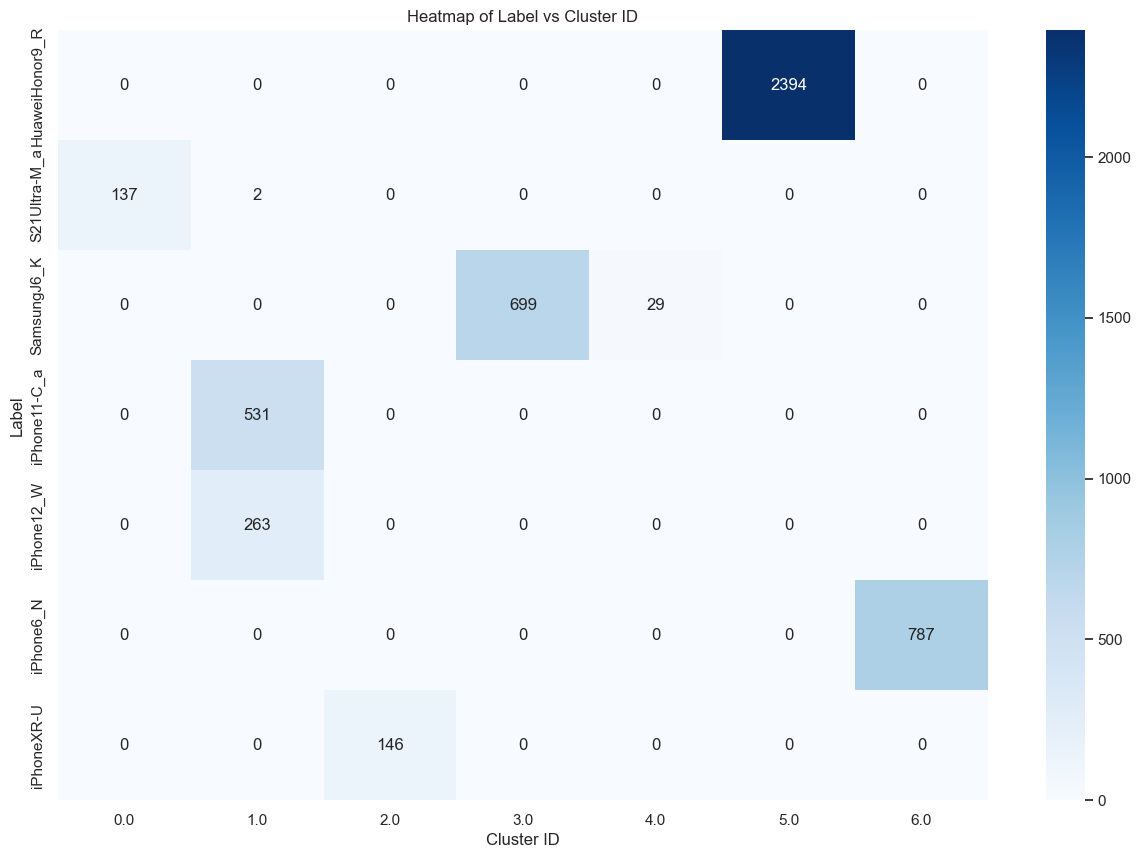

In [551]:
best_df, _, _, _, _ = cluster_rows(burst_df, 5, burst_df.columns)
plot_heatmap(best_df, "Label", "Cluster ID")


In [ ]:
best_df[best_df['MAC Address'] == 'ee:18:b9:9c:f9:f0']


In [ ]:

best_df[best_df['Cluster ID'] == 3]


In [ ]:
# Read csv files from challenge-dataset, and assign each of them to a different dataframe 
directory = 'challenge-dataset'
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
challenge_dfs = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]


In [ ]:
def create_dataset(test_set_K, df,K):
    all_dfs = {f"{key}": [] for key in test_set_K.keys()}

    for test_set in test_set_K:
        random_indices = np.random.choice(len(df), K, replace=False)
        selected_dfs = pd.DataFrame()
        for index in random_indices:
            selected_dfs = pd.concat([selected_dfs, df[index]], ignore_index=True)
        all_dfs[f"{test_set}"].append(selected_dfs)
    return pd.DataFrame(all_dfs)

In [ ]:
test_set_K_2 = {f"Test Set {i+1}": [] for i in range(5)}
test_set_K_3 = {f"Test Set {i+1}": [] for i in range(5)}
test_set_K_4 = {f"Test Set {i+1}": [] for i in range(5)}
test_set_K_5 = {f"Test Set {i+1}": [] for i in range(5)}
test_set_K_6 = {"Test Set 1": []}

test_set_K_2 = create_dataset(test_set_K_2, challenge_dfs, 2)
test_set_K_3 = create_dataset(test_set_K_3, challenge_dfs, 3)
test_set_K_4 = create_dataset(test_set_K_4, challenge_dfs, 4)
test_set_K_5 = create_dataset(test_set_K_5, challenge_dfs, 5)
test_set_K_6 = create_dataset(test_set_K_6, challenge_dfs, 6)
  
del challenge_dfs

In [ ]:
def preprocess(df):
    # Drop columns with more than 60% missing values
    nan_sum = df.isna().sum()
    nan_percentage = (nan_sum/len(df))*100
    col_drop = [nan_percentage.index[i] for i in range(len(nan_percentage)) if nan_percentage[i] > 60]
    df = df.drop(col_drop, axis=1)

    # Encode categorical features with less than 20 unique values
    unique_elem = df.nunique()
    features = [unique_elem.index[i] for i in range(len(unique_elem)-1) if unique_elem[i] < 20]
    df = encoder(df, features)

    # Drop other columns that are not in features except 'MAC Address'
    df = df.drop(df.columns.difference(features+['MAC Address'] + ['Label']), axis=1)

    return df

In [ ]:
# Preprocess each dataframe in the random_dfs_df
preprocessed_df_K_2 = test_set_K_2.applymap(preprocess)
preprocessed_df_K_3 = test_set_K_3.applymap(preprocess)
preprocessed_df_K_4 = test_set_K_4.applymap(preprocess)
preprocessed_df_K_5 = test_set_K_5.applymap(preprocess)
preprocessed_df_K_6 = test_set_K_6.applymap(preprocess)

del test_set_K_2, test_set_K_3, test_set_K_4, test_set_K_5, test_set_K_6

In [ ]:
preprocessed_df_K_2.iloc[0,0]['Label'].unique()
#random_dfs_df.at[4,'Test Set 1']['Label'].unique()

In [ ]:
preprocessed_df_K_2.iloc[0,0]


In [ ]:
def measure_v(test_sets, N_values = range(1, len(usable_features)+1)):
    results = []
    for i in range(test_sets.shape[1]):
        usable_features = test_sets.iloc[0,i].columns.drop('Label')
        for N in N_values:
            _, h, c, v, error = cluster_rows(test_sets.iloc[0,i], N, usable_features)
            results.append({'Test Set': f"Test Set {i+1}", 'N': N, 'V-measure': v, 'Homogeneity': h, 'Completeness': c, 'Error': error})       
    return pd.DataFrame(results)

In [ ]:
N_values = [4] # Number of matching features, it can be range(1, len(usable_features)+1)) to test all values
results_K_2 = measure_v(preprocessed_df_K_2, N_values)
results_K_3 = measure_v(preprocessed_df_K_3, N_values)
results_K_4 = measure_v(preprocessed_df_K_4, N_values)
results_K_5 = measure_v(preprocessed_df_K_5, N_values)
results_K_6 = measure_v(preprocessed_df_K_6, N_values)

In [ ]:
# # Save the results to a CSV file
# results_K_2.to_csv('results_K_2.csv', index=False)
# results_K_3.to_csv('results_K_3.csv', index=False)
# results_K_4.to_csv('results_K_4.csv', index=False)
# results_K_5.to_csv('results_K_5.csv', index=False)
# results_K_6.to_csv('results_K_6.csv', index=False)

In [ ]:
# # Read the results from the CSV file
# results_K_2 = pd.read_csv('results_K_2.csv')
# results_K_3 = pd.read_csv('results_K_3.csv')
# results_K_4 = pd.read_csv('results_K_4.csv')
# results_K_5 = pd.read_csv('results_K_5.csv')
# results_K_6 = pd.read_csv('results_K_6.csv')

In [ ]:
# # Print the Test Set 1 results in results_K_2
# results_K_2_df = pd.DataFrame(results_K_2)
# # Get the maximum V-measure score for each Test Set and their corresponding N value
# max_v_measure_K_2 =results_K_2.loc[results_K_2.groupby('Test Set')['V-measure'].idxmax()]
# max_v_measure_K_3 =results_K_3.loc[results_K_3.groupby('Test Set')['V-measure'].idxmax()]
# max_v_measure_K_4 =results_K_4.loc[results_K_4.groupby('Test Set')['V-measure'].idxmax()]
# max_v_measure_K_5 =results_K_5.loc[results_K_5.groupby('Test Set')['V-measure'].idxmax()]
# max_v_measure_K_6 =results_K_6.loc[results_K_6.groupby('Test Set')['V-measure'].idxmax()]


In [ ]:
# # Display the maximum V-measure score for each Test Set
# display(max_v_measure_K_2)
# display(max_v_measure_K_3)
# display(max_v_measure_K_4)
# display(max_v_measure_K_5)
# display(max_v_measure_K_6)

In [ ]:
preprocessed_df_K_6.iloc[0,0]['Label'].value_counts()

In [ ]:
display(results_K_2)
display(results_K_3)
display(results_K_4)
display(results_K_5)
display(results_K_6)

In [ ]:

# Get average V-measure score and Error of max_v_measure
average_v_measure = results_K_3['V-measure'].mean()
average_error = results_K_3['Error'].mean()
print(f"Average V-measure: {average_v_measure}")
print(f"Average Error: {average_error}")

In [ ]:
# Print all unique MAC Addresses in the first test set
for i in range(0,preprocessed_df_K_2.shape[1]):
  print("number of unique MAC: ", preprocessed_df_K_2.iloc[0,i]['MAC Address'].nunique())

In [ ]:
# Print all unique MAC Addresses in the first test set
for i in range(0,preprocessed_df_K_3.shape[1]):
  print("number of unique MAC: ", preprocessed_df_K_3.iloc[0,i]['MAC Address'].nunique())

In [ ]:
# Print all unique MAC Addresses in the first test set
for i in range(0,preprocessed_df_K_4.shape[1]):
  print("number of unique MAC: ", preprocessed_df_K_4.iloc[0,i]['MAC Address'].nunique())

In [ ]:
# Print all unique MAC Addresses in the first test set
for i in range(0,preprocessed_df_K_5.shape[1]):
  print("number of unique MAC: ", preprocessed_df_K_5.iloc[0,i]['MAC Address'].nunique())

In [ ]:
# Print all unique MAC Addresses in the first test set
for i in range(0,preprocessed_df_K_6.shape[1]):
  print("number of unique MAC: ", preprocessed_df_K_6.iloc[0,i]['MAC Address'].nunique())

In [ ]:
# Read data from the CSV file
unlabelled = pd.read_csv('MAC_derand_unlabelled-challenge.csv')

In [ ]:
display(unlabelled)

In [ ]:
unlabelled = preprocess(unlabelled)

In [ ]:
unlabelled['MAC Address'].nunique()

In [ ]:
for i in range(1, len(unlabelled.columns)):
    clustred_unlabelled = cluster_rows(unlabelled, i, unlabelled.columns)
    print(clustred_unlabelled['Cluster ID'].nunique())

In [ ]:
clustred_unlabelled = cluster_rows(unlabelled, 4, unlabelled.columns)

In [ ]:
clustred_unlabelled.groupby('Cluster ID').size()
display(clustred_unlabelled[clustred_unlabelled['Cluster ID'] == 7])